In [1]:
import pandas as pd

Import the dataset into a pandas Data Frame:

In [2]:
dataset_df = pd.read_csv("data/Sl-and-MT-GINCO-mapped-to-GINCORE-keeptext.csv")

dataset_df.head()

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,tertiary_level_1,tertiary_level_2,tertiary_level_3,split,domain,GINCORE,full_text,MT-text,text_length
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,NaN,NaN,NaN,test,www.pomurje.si,News,"Šport <p/> Zimska liga malega nogometa sobota,...",Sport <p/> Winter Little League Football Satur...,93
1,3726,http://www.ss-sezana.si/sss/index.php?option=c...,2014,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,NaN,NaN,NaN,train,www.ss-sezana.si,Information/Explanation,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,JEDILNIK <p/> Search <p/> The main objective o...,76
2,5621,http://www.kamnik-starejsi.si/novice/144-sodel...,2014,False,Promotion of Services,Promotion of Services,Promotion,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,Information/Explanation,Information/Explanation,Information/Explanation,train,www.kamnik-starejsi.si,Promotion,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...,Project INNOVAge and the Oreli Institute <p/> ...,232
3,3776,http://www.radiocelje.si/novica.php?id=13007&a...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,NaN,NaN,NaN,train,www.radiocelje.si,News,"V novembru, mesecu preprečevanja odvisnosti, b...","In November, the month of addiction prevention...",158
4,2102,http://www.mtv.si/novice/selena-gomez-ponudila...,2014,False,Opinionated News,Opinionated News,Opinionated News,NaN,NaN,NaN,NaN,NaN,NaN,test,www.mtv.si,News,Selena Gomez ponudila v poslušanje novi album ...,Selena Gomez launches new album <p/> 16.07.201...,63


Inspect the label distribution:

In [4]:
print(dataset_df.GINCORE.value_counts().to_markdown())

|                            |   GINCORE |
|:---------------------------|----------:|
| Promotion                  |       209 |
| News                       |       204 |
| Information/Explanation    |       130 |
| Opinion/Argumentation      |       114 |
| List of Summaries/Excerpts |       106 |
| Forum                      |        52 |
| Instruction                |        38 |
| Other                      |        34 |
| Review                     |        17 |
| Legal/Regulation           |        17 |
| Announcement               |        17 |
| Correspondence             |        16 |
| Call                       |        11 |
| Research Article           |         9 |
| Interview                  |         8 |
| Recipe                     |         6 |
| Prose                      |         6 |
| Lyrical                    |         4 |
| FAQ                        |         3 |
| Script/Drama               |         1 |


We should discard categories with less than 5 instances, as well as the GINCORE categories that do not appear in the CORE dataset (for better comparability).

In [5]:
LABELS = ['News', 'Forum', 'Opinion/Argumentation', 'Review', 'Research Article', 'Information/Explanation', 'Promotion', 'Instruction', 'Prose', 'Interview', 'Legal/Regulation', 'Recipe']
len(LABELS)

12

In [7]:
final_dataset = dataset_df[dataset_df["GINCORE"].isin(LABELS)]

final_dataset.describe(include="all")

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,tertiary_level_1,tertiary_level_2,tertiary_level_3,split,domain,GINCORE,full_text,MT-text,text_length
count,810,810,810.00000,810,810,810,810,180,180,180,127,127,127,810,810,810,810,810,810.00000
unique,810,725,NaN,2,16,16,10,13,13,9,12,12,8,3,611,12,810,810,NaN
top,3949,https://publishwall.si/pozareport.7dni,NaN,False,Information/Explanation,Information/Explanation,Promotion,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation,train,www.zurnal24.si,Promotion,"Šport <p/> Zimska liga malega nogometa sobota,...",Sport <p/> Winter Little League Football Satur...,NaN
freq,1,8,NaN,756,130,130,209,51,51,51,44,44,44,484,10,209,1,1,NaN
mean,NaN,NaN,2017.32716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364.40000
std,NaN,NaN,3.49789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,485.34383
min,NaN,NaN,2014.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00000
25%,NaN,NaN,2014.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.25000
50%,NaN,NaN,2014.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.50000
75%,NaN,NaN,2021.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424.50000


In [8]:
final_dataset.head()

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,tertiary_level_1,tertiary_level_2,tertiary_level_3,split,domain,GINCORE,full_text,MT-text,text_length
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,NaN,NaN,NaN,test,www.pomurje.si,News,"Šport <p/> Zimska liga malega nogometa sobota,...",Sport <p/> Winter Little League Football Satur...,93
1,3726,http://www.ss-sezana.si/sss/index.php?option=c...,2014,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,NaN,NaN,NaN,train,www.ss-sezana.si,Information/Explanation,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,JEDILNIK <p/> Search <p/> The main objective o...,76
2,5621,http://www.kamnik-starejsi.si/novice/144-sodel...,2014,False,Promotion of Services,Promotion of Services,Promotion,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,Information/Explanation,Information/Explanation,Information/Explanation,train,www.kamnik-starejsi.si,Promotion,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...,Project INNOVAge and the Oreli Institute <p/> ...,232
3,3776,http://www.radiocelje.si/novica.php?id=13007&a...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,NaN,NaN,NaN,train,www.radiocelje.si,News,"V novembru, mesecu preprečevanja odvisnosti, b...","In November, the month of addiction prevention...",158
4,2102,http://www.mtv.si/novice/selena-gomez-ponudila...,2014,False,Opinionated News,Opinionated News,Opinionated News,NaN,NaN,NaN,NaN,NaN,NaN,test,www.mtv.si,News,Selena Gomez ponudila v poslušanje novi album ...,Selena Gomez launches new album <p/> 16.07.201...,63


In [12]:
final_dataset.GINCORE.value_counts()

Promotion                  209
News                       204
Information/Explanation    130
Opinion/Argumentation      114
Forum                       52
Instruction                 38
Legal/Regulation            17
Review                      17
Research Article             9
Interview                    8
Recipe                       6
Prose                        6
Name: GINCORE, dtype: int64

--> 192 texts were discarded, 810 texts were used.

In [13]:
# Let's keep only the relevant columns

reduced_dataset = final_dataset[["full_text","MT-text","GINCORE"]]
reduced_dataset.columns = ["Sl-text","MT-text","labels"]

reduced_dataset.head()

,Sl-text,MT-text,labels
0,"Šport <p/> Zimska liga malega nogometa sobota,...",Sport <p/> Winter Little League Football Satur...,News
1,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,JEDILNIK <p/> Search <p/> The main objective o...,Information/Explanation
2,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...,Project INNOVAge and the Oreli Institute <p/> ...,Promotion
3,"V novembru, mesecu preprečevanja odvisnosti, b...","In November, the month of addiction prevention...",News
4,Selena Gomez ponudila v poslušanje novi album ...,Selena Gomez launches new album <p/> 16.07.201...,News


In [14]:
reduced_dataset.describe()

,Sl-text,MT-text,labels
count,810,810,810
unique,810,810,12
top,"Šport <p/> Zimska liga malega nogometa sobota,...",Sport <p/> Winter Little League Football Satur...,Promotion
freq,1,1,209


Create a stratified split. First split the dataset into train and devtest and then split the devtest into dev and test. The final split will be 60:20:20.

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

train, devtest = train_test_split(reduced_dataset, test_size=0.4, random_state=42, shuffle = True, stratify = reduced_dataset.labels)

In [16]:
train.describe()

,Sl-text,MT-text,labels
count,486,486,486
unique,486,486,12
top,PES - BITJE ZA OSAMLJENE? <p/> Življenje z živ...,DOG - A CREATURE FOR THE LONELY? <p/> Living w...,Promotion
freq,1,1,125


In [17]:
devtest.labels.value_counts()

Promotion                  84
News                       82
Information/Explanation    52
Opinion/Argumentation      45
Forum                      21
Instruction                15
Legal/Regulation            7
Review                      7
Research Article            4
Interview                   3
Prose                       2
Recipe                      2
Name: labels, dtype: int64

In [18]:
test, dev = train_test_split(devtest, test_size=0.5, random_state=42, shuffle = True, stratify = devtest.labels)

Observe the distribution of the labels in all sets.

<AxesSubplot:xlabel='value', ylabel='Count'>

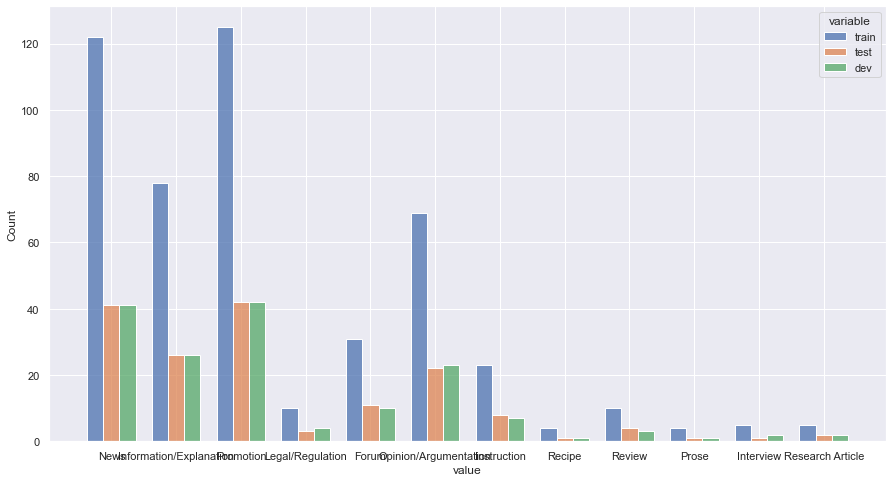

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# make dataframe
df = pd.DataFrame({"train":train.labels, "test":test.labels, "dev": dev.labels})

# plot melted dataframe in a single command
sns.set(rc = {'figure.figsize':(15,8)})

sns.histplot(df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20)


In [20]:
df.describe()

,train,test,dev
count,486,162,162
unique,12,12,12
top,Promotion,Promotion,Promotion
freq,125,42,42


Create separate dataframes for Slovene GINCO and MT GINCO

In [21]:
train.head()

,Sl-text,MT-text,labels
61,PES - BITJE ZA OSAMLJENE? <p/> Življenje z živ...,DOG - A CREATURE FOR THE LONELY? <p/> Living w...,Opinion/Argumentation
90,Predelne stene <p/> Pogosto se zgodi da pri gr...,Partition walls <p/> It often happens that whe...,Promotion
148,V Izoli se je končal 9. mednarodni turnir v go...,The 9th International Golf Tournament is held ...,News
444,Okvirji za vaše plakate <p/> Pri naročilu okvi...,Frames for your posters <p/> There are a few t...,Instruction
217,"Bojijo se lakote <p/> Sto ekip, 30 evropskih m...",They are afraid of hunger <p/> One hundred tea...,News


In [23]:
train_MT = train[["MT-text","labels"]]
train_MT.columns = ["text","labels"]
train_MT

,text,labels
61,DOG - A CREATURE FOR THE LONELY? <p/> Living w...,Opinion/Argumentation
90,Partition walls <p/> It often happens that whe...,Promotion
148,The 9th International Golf Tournament is held ...,News
444,Frames for your posters <p/> There are a few t...,Instruction
217,They are afraid of hunger <p/> One hundred tea...,News
...,...,...
260,exact route (e.g. headquarters LJ - CE - MB - ...,Information/Explanation
919,"Zmago Jelinčič, Member of the National Assembl...",Information/Explanation
167,The L eopold Museum in Vienna has announced th...,News
902,"Two tankers at berth. Well, at least I hope th...",Forum


In [24]:
test_MT = test[["MT-text","labels"]]
test_MT.columns = ["text","labels"]
test_MT

,text,labels
670,Kitchen green tiles Metrotiles Light green 10x...,Promotion
959,"Preparation of young sprinters, Belgrade - 23....",News
268,OUT FIT <p/> OUTFIT is a unique workout based ...,Promotion
146,The weather has not been kind to football acti...,News
432,Nourishing masks from your home kitchen <p/> H...,Instruction
...,...,...
997,Project News <p/> Promotional project newspape...,Information/Explanation
922,Ombudsman <p/> ČP <p/> Consistency in respondi...,Legal/Regulation
445,Insured persons in compulsory health insurance...,Information/Explanation
457,@ PJ. I will briefly repeat my reply to your c...,Forum


In [25]:
dev_MT = dev[["MT-text","labels"]]
dev_MT.columns = ["text","labels"]
dev_MT

,text,labels
41,Charity run of the Happy Feet <p/> The first c...,Promotion
466,Sexually transmitted infections (STIs) are inf...,Information/Explanation
877,After the Polanski Bandits became the national...,News
293,"I am the mother of 21-month-old Rene, a very l...",Opinion/Argumentation
503,REGULAR OPENING HOURS OF OUR STORES <p/> We ar...,Promotion
...,...,...
812,"As in previous years, the Association took par...",News
895,New calls for tender <p/> Subject of the call:...,Information/Explanation
738,"VARSTOR, JERNEJ ŠTORGELJ, s.p.from Rečice ob S...",Information/Explanation
17,The saddest thing is that she has to defend he...,Forum


Save the new files for MT GINCO as csv

In [26]:
train_MT.to_csv("MT_GINCO_train.csv", index=False)
test_MT.to_csv("MT_GINCO_test.csv", index=False)
dev_MT.to_csv("MT_GINCO_dev.csv", index=False)

Repeat the same with Slovene GINCO

In [29]:
train_SI = train[["Sl-text","labels"]]
train_SI.columns = ["text","labels"]
train_SI

,text,labels
61,PES - BITJE ZA OSAMLJENE? <p/> Življenje z živ...,Opinion/Argumentation
90,Predelne stene <p/> Pogosto se zgodi da pri gr...,Promotion
148,V Izoli se je končal 9. mednarodni turnir v go...,News
444,Okvirji za vaše plakate <p/> Pri naročilu okvi...,Instruction
217,"Bojijo se lakote <p/> Sto ekip, 30 evropskih m...",News
...,...,...
260,natančno relacijo poti (npr. sedež LJ – CE – M...,Information/Explanation
919,"Zmago Jelinčič, koroški poslanec v Državnem zb...",Information/Explanation
167,"L eopoldov muzej na Dunaju je napovedal, da bo...",News
902,"Dva tankerja na privezu. No, vsaj upam, da sta...",Forum


In [30]:
test_SI = test[["Sl-text","labels"]]
test_SI.columns = ["text","labels"]
test_SI

,text,labels
670,Kuhinjske zelene ploščice Metrotiles Svetlo ze...,Promotion
959,"Priprave mladih šprinterjev, Beograd - 23.12.-...",News
268,OUT FIT <p/> OUTFIT je edinstvena vadba zasnov...,Promotion
146,Vreme v zadnjem obdobju ni naklonjeno nogometn...,News
432,Hranilne maske iz domače kuhinje <p/> Med z gr...,Instruction
...,...,...
997,Projektne novine <p/> Promocijski projektni ča...,Information/Explanation
922,Varuh <p/> ČP <p/> Doslednost pri odgovarjanju...,Legal/Regulation
445,Zavarovane osebe v obveznem zdravstvenem zavar...,Information/Explanation
457,@ PJ. Na kratko bom ponovil odgovor na tvoj ko...,Forum


In [31]:
dev_SI = dev[["Sl-text","labels"]]
dev_SI.columns = ["text","labels"]
dev_SI

,text,labels
41,Dobrodelni tek Vesele nogice <p/> V Laškem se ...,Promotion
466,"Spolno prenosljive okužbe (SPO) so okužbe, ki ...",Information/Explanation
877,Po tem ko so državni prvaki postali Polanski B...,News
293,"Sem mamica 21 mesečnega Reneja, izredno živahn...",Opinion/Argumentation
503,REDNI DELOVNI ČAS NAŠIH PRODAJALN <p/> Z izjem...,Promotion
...,...,...
812,Tako kot prejšnja leta se je tudi tokrat društ...,News
895,Novi javni razpisi <p/> Predmet javnega razpis...,Information/Explanation
738,"Podjetje VARSTOR, JERNEJ ŠTORGELJ, s.p.iz Reči...",Information/Explanation
17,"najbolj žalostno je to, da se mora zagovarjat ...",Forum


In [32]:
train_SI.to_csv("SI_GINCO_train.csv", index=False)
test_SI.to_csv("SI_GINCO_test.csv", index=False)
dev_SI.to_csv("SI_GINCO_dev.csv", index=False)